In [1]:
%reset -f

In [187]:
import pandas as pd 
# Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from numpy import log

# Matplotlib settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set()



import statsmodels.formula.api as smf 
from numpy import log

# Matplotlib settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set()

# Bokeh settings
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, Circle, HoverTool, \
    ColorBar, LinearColorMapper, LogColorMapper, CustomJS, Slider
from bokeh.palettes import Viridis256, brewer,Bokeh
#from bokeh.tile_providers import CARTODBPOSITRON_RETINA
from bokeh.tile_providers import get_provider, Vendors 
tile_provider = get_provider(Vendors.OSM)
tile_provider2 = get_provider(Vendors.CARTODBPOSITRON_RETINA)

from bokeh.models.widgets import Panel, Tabs
from bokeh.layouts import column

In [4]:
df = pd.read_csv('2020-all-data.csv')

# Encoding time features 
#seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
#month_to_season = dict(zip(range(1,13), seasons))

#TOTAL_BIKES = len(df['bikeid'].unique())


df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])
#df['season'] = df.starttime.dt.month.map(month_to_season) 
#df['month']  = df.starttime.dt.month
#df['dayofweek'] = df.starttime.dt.dayofweek
#df['day'] = df.starttime.dt.day
#df['hour'] = df.starttime.dt.hour
#df["dayofyear"] = pd.DatetimeIndex(df["starttime"]).dayofyear


In [5]:
df['stoptime'] = pd.to_datetime(df['stoptime'])

In [6]:
names = pd.read_csv('station_names.csv')
new_header = names.iloc[0] #grab the first row for the header
names = names[1:] #take the data less the header row
names.columns = new_header #set the header row as the df header
names = names.dropna(axis=1, how="any")
names.columns = ['no','station_id','sname']
names
coors = pd.read_csv('coors.csv')
coors = coors.rename(columns = {'staion_id':'station_id'})
coors

station_id  longitude   latitude  slots
0          1001  76.967225  43.223566      8
1          1002  76.961225  43.226664     12
2          1003  76.953318  43.224545     10
3          1004  76.954100  43.228700     10
4          1005  76.953200  43.232400      6
..          ...        ...        ...    ...
185        5001  76.930500  43.269944     10
186        6001  76.824470  43.250529      6
187        6002  76.821285  43.253628     10
188        6003  76.822015  43.256422      6
189        6004  76.820398  43.260135      8

[190 rows x 4 columns]

In [7]:
names["station_id"] = pd.to_numeric(names["station_id"])
coors = coors.merge(names, on='station_id', how='left')
coors

station_id  longitude   latitude  slots   no  \
0          1001  76.967225  43.223566      8    1   
1          1002  76.961225  43.226664     12    2   
2          1003  76.953318  43.224545     10    3   
3          1004  76.954100  43.228700     10    4   
4          1005  76.953200  43.232400      6    5   
..          ...        ...        ...    ...  ...   
185        5001  76.930500  43.269944     10  183   
186        6001  76.824470  43.250529      6  184   
187        6002  76.821285  43.253628     10  185   
188        6003  76.822015  43.256422      6  186   
189        6004  76.820398  43.260135      8  187   

                                             sname  
0           Терренкур 1 (Ул.Омарова-ул.Луганского)  
1                       пр.Достык – ул.Хаджымукана  
2                    ул. Назарбаева–ул.Хаджымукана  
3    Кафе Менд-Аль ( пр.Аль-Фараби-ул.Мендикулова)  
4      Kcell centr (ул. Мендикулова -ул.Бектурова)  
..                                             ...  
185                  пр. Райымбека - пр.Сейфуллина  
186            пр.Рыскулова - ул.Момышулы (Магнум)  
187   Нуркент ( Торгово-административный комплекс)  
188          остановка Наурыз(мкр. Нуркент дом 37)  
189         "Алатау" Театр традиционного искусства  

[190 rows x 6 columns]

In [8]:
coors.drop(coors.columns[4],axis=1,inplace=True)
coors

station_id  longitude   latitude  slots  \
0          1001  76.967225  43.223566      8   
1          1002  76.961225  43.226664     12   
2          1003  76.953318  43.224545     10   
3          1004  76.954100  43.228700     10   
4          1005  76.953200  43.232400      6   
..          ...        ...        ...    ...   
185        5001  76.930500  43.269944     10   
186        6001  76.824470  43.250529      6   
187        6002  76.821285  43.253628     10   
188        6003  76.822015  43.256422      6   
189        6004  76.820398  43.260135      8   

                                             sname  
0           Терренкур 1 (Ул.Омарова-ул.Луганского)  
1                       пр.Достык – ул.Хаджымукана  
2                    ул. Назарбаева–ул.Хаджымукана  
3    Кафе Менд-Аль ( пр.Аль-Фараби-ул.Мендикулова)  
4      Kcell centr (ул. Мендикулова -ул.Бектурова)  
..                                             ...  
185                  пр. Райымбека - пр.Сейфуллина  
186            пр.Рыскулова - ул.Момышулы (Магнум)  
187   Нуркент ( Торгово-административный комплекс)  
188          остановка Наурыз(мкр. Нуркент дом 37)  
189         "Алатау" Театр традиционного искусства  

[190 rows x 5 columns]

In [9]:
#
coors = coors.dropna()
coors[coors.isna().any(axis=1)]
coors

station_id  longitude   latitude  slots  \
0          1001  76.967225  43.223566      8   
1          1002  76.961225  43.226664     12   
2          1003  76.953318  43.224545     10   
3          1004  76.954100  43.228700     10   
4          1005  76.953200  43.232400      6   
..          ...        ...        ...    ...   
185        5001  76.930500  43.269944     10   
186        6001  76.824470  43.250529      6   
187        6002  76.821285  43.253628     10   
188        6003  76.822015  43.256422      6   
189        6004  76.820398  43.260135      8   

                                             sname  
0           Терренкур 1 (Ул.Омарова-ул.Луганского)  
1                       пр.Достык – ул.Хаджымукана  
2                    ул. Назарбаева–ул.Хаджымукана  
3    Кафе Менд-Аль ( пр.Аль-Фараби-ул.Мендикулова)  
4      Kcell centr (ул. Мендикулова -ул.Бектурова)  
..                                             ...  
185                  пр. Райымбека - пр.Сейфуллина  
186            пр.Рыскулова - ул.Момышулы (Магнум)  
187   Нуркент ( Торгово-административный комплекс)  
188          остановка Наурыз(мкр. Нуркент дом 37)  
189         "Алатау" Театр традиционного искусства  

[187 rows x 5 columns]

In [10]:
df = pd.merge(df, coors[['station_id','slots','sname']], how='left', left_on='end station id', right_on='station_id')
df = df.rename(columns={'slots':'end_st_slots',
                        'sname':'end_st_name'})
#df
#df.drop(df.columns['station_id'],axis=1,inplace=True)

df = pd.merge(df, coors[['station_id','slots','sname']], how='left', left_on='start station id', right_on='station_id')
df = df.rename(columns={'slots':'start_st_slots',
                        'sname':'start_st_name'})
df


tripduration                  starttime                   stoptime  \
0               1424 2020-01-16 10:16:08.000002 2020-01-16 10:39:56.999998   
1               1450 2020-01-16 10:40:14.000001 2020-01-16 11:04:28.000001   
2               1341 2020-01-16 10:41:19.000000 2020-01-16 11:03:43.999998   
3                319 2020-01-16 11:12:32.999999 2020-01-16 11:17:55.999997   
4                661 2020-01-16 11:13:25.999997 2020-01-16 11:24:31.000000   
...              ...                        ...                        ...   
915059          1112 2020-12-31 22:44:32.000001 2020-12-31 23:03:08.999997   
915060          1230 2020-12-31 22:46:59.000002 2020-12-31 23:07:33.000001   
915061          7959 2020-12-31 22:54:28.999999 2021-01-01 01:07:13.999999   
915062           408 2020-12-31 23:00:37.000002 2020-12-31 23:07:29.000001   
915063           507 2020-12-31 23:11:47.000000 2020-12-31 23:20:18.999997   

        start station id  startstation_lat  startstation_lon  end station id  \
0                   1004         43.228700         76.954100            1006   
1                   1006         43.234857         76.958203            1006   
2                   1015         43.250500         76.954100            1021   
3                   1013         43.246600         76.948000            1010   
4                   2021         43.206270         76.898812            2029   
...                  ...               ...               ...             ...   
915059              2037         43.225700         76.906400            4003   
915060              4020         43.220200         76.852400            6001   
915061              4011         43.217428         76.863722            4037   
915062              4017         43.231100         76.868500            2067   
915063              6001         43.250529         76.824470            6001   

        endstation_lat  endstation_lon  bikeid  covered distance  \
0            43.234857       76.958203  6040.0              1082   
1            43.234857       76.958203  6040.0               338   
2            43.261111       76.965778  5897.0              3514   
3            43.242860       76.951452  4496.0               667   
4            43.218742       76.897073  6025.0              1925   
...                ...             ...     ...               ...   
915059       43.217714       76.875977  5667.0              2695   
915060       43.250529       76.824470  4610.0              4688   
915061       43.238599       76.859327  6366.0              3436   
915062       43.237800       76.883500  6681.0              1382   
915063       43.250529       76.824470  4610.0              1119   

        station_id_x  end_st_slots                                end_st_name  \
0               1006             8  пр. Достык - ул.Жолдасбекова (ТЦ Евразия)   
1               1006             8  пр. Достык - ул.Жолдасбекова (ТЦ Евразия)   
2               1021            10                        ПКиО им. М.Горького   
3               1010             8   ст.метро "Абая" (пр. Абая - ул. Кунаева)   
4               2029            10                   ул.Утепова - ул.Гагарина   
...              ...           ...                                        ...   
915059          4003            10              ул.Жандосова – ул.Алтынсарина   
915060          6001             6        пр.Рыскулова - ул.Момышулы (Магнум)   
915061          4037            10             ул.Кабдолова – ул.Утеген батыр   
915062          2067            10                  пр.Абая – ул.Тургут Озала   
915063          6001             6        пр.Рыскулова - ул.Момышулы (Магнум)   

        station_id_y  start_st_slots  \
0               1004              10   
1               1006               8   
2               1015               6   
3               1013              10   
4               2021              16   
...              ...             ...   
915059          2037              24   


In [11]:
df.drop(columns = ['station_id_x','station_id_y'],axis=1,inplace=True)

In [12]:
df

tripduration                  starttime                   stoptime  \
0               1424 2020-01-16 10:16:08.000002 2020-01-16 10:39:56.999998   
1               1450 2020-01-16 10:40:14.000001 2020-01-16 11:04:28.000001   
2               1341 2020-01-16 10:41:19.000000 2020-01-16 11:03:43.999998   
3                319 2020-01-16 11:12:32.999999 2020-01-16 11:17:55.999997   
4                661 2020-01-16 11:13:25.999997 2020-01-16 11:24:31.000000   
...              ...                        ...                        ...   
915059          1112 2020-12-31 22:44:32.000001 2020-12-31 23:03:08.999997   
915060          1230 2020-12-31 22:46:59.000002 2020-12-31 23:07:33.000001   
915061          7959 2020-12-31 22:54:28.999999 2021-01-01 01:07:13.999999   
915062           408 2020-12-31 23:00:37.000002 2020-12-31 23:07:29.000001   
915063           507 2020-12-31 23:11:47.000000 2020-12-31 23:20:18.999997   

        start station id  startstation_lat  startstation_lon  end station id  \
0                   1004         43.228700         76.954100            1006   
1                   1006         43.234857         76.958203            1006   
2                   1015         43.250500         76.954100            1021   
3                   1013         43.246600         76.948000            1010   
4                   2021         43.206270         76.898812            2029   
...                  ...               ...               ...             ...   
915059              2037         43.225700         76.906400            4003   
915060              4020         43.220200         76.852400            6001   
915061              4011         43.217428         76.863722            4037   
915062              4017         43.231100         76.868500            2067   
915063              6001         43.250529         76.824470            6001   

        endstation_lat  endstation_lon  bikeid  covered distance  \
0            43.234857       76.958203  6040.0              1082   
1            43.234857       76.958203  6040.0               338   
2            43.261111       76.965778  5897.0              3514   
3            43.242860       76.951452  4496.0               667   
4            43.218742       76.897073  6025.0              1925   
...                ...             ...     ...               ...   
915059       43.217714       76.875977  5667.0              2695   
915060       43.250529       76.824470  4610.0              4688   
915061       43.238599       76.859327  6366.0              3436   
915062       43.237800       76.883500  6681.0              1382   
915063       43.250529       76.824470  4610.0              1119   

        end_st_slots                                end_st_name  \
0                  8  пр. Достык - ул.Жолдасбекова (ТЦ Евразия)   
1                  8  пр. Достык - ул.Жолдасбекова (ТЦ Евразия)   
2                 10                        ПКиО им. М.Горького   
3                  8   ст.метро "Абая" (пр. Абая - ул. Кунаева)   
4                 10                   ул.Утепова - ул.Гагарина   
...              ...                                        ...   
915059            10              ул.Жандосова – ул.Алтынсарина   
915060             6        пр.Рыскулова - ул.Момышулы (Магнум)   
915061            10             ул.Кабдолова – ул.Утеген батыр   
915062            10                  пр.Абая – ул.Тургут Озала   
915063             6        пр.Рыскулова - ул.Момышулы (Магнум)   

        start_st_slots                                      start_st_name  
0                   10      Кафе Менд-Аль ( пр.Аль-Фараби-ул.Мендикулова)  
1                    8          пр. Достык - ул.Жолдасбекова (ТЦ Евразия)  
2                    6  Салон красоты Алма (ул.Пушкина-ул.Кабанбай бат...  
3                   10        Магазин Беташар (пр.Назарбаева-ул.Шевченко)  
4                   16                по ул.Гагарина (Супермаркет Magnum)  
...                ...          

# EDA ______

In [13]:
# Show first and last rentals of the season
print('Первая поездка: ', df['starttime'].min())
print('Последняя поездка за 2020: ', df['starttime'].max())

Первая поездка:  2020-01-16 10:16:08.000002
Последняя поездка за 2020:  2020-12-31 23:11:47


In [14]:
# Show number of trips longer than 24hrs
Nsd = 24*60*60 #number of seconds in a day
Ntd = np.count_nonzero(df['tripduration']>Nsd)
print("Количество поездок дольше чем 24 часа : %d ( %0.2g %% )"
      % (Ntd, 100*Ntd/float(len(df))))

Количество поездок дольше чем 24 часа : 15 ( 0.0016 % )


In [15]:
# Show number of trips shorter than 1hr
Ntd = np.count_nonzero(df['tripduration']<(24*60))
print("Количество поездок короче чем 1 час: %d ( %0.2g %% )"
      % (Ntd, 100*Ntd/float(len(df))))



Количество поездок короче чем 1 час: 662371 ( 72 % )


c:\users\sci\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


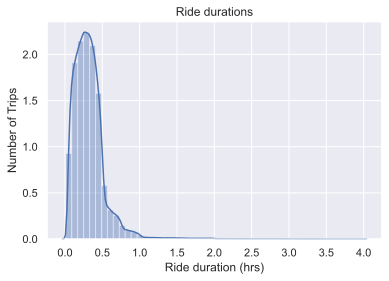

In [16]:
# Plot histogram of ride durations(Гистограмма поездок не превыш. 24 часа)
plt.figure()
sns.distplot(df.loc[df['tripduration']<(4*60*60),
                       'tripduration']/3600)
plt.xlabel('Ride duration (hrs)')
plt.ylabel('Number of Trips')
plt.title('Ride durations')
plt.show()

c:\users\sci\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


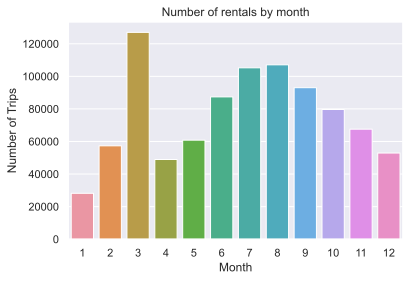

In [17]:
# Plot number of rides per month
plt.figure()
sns.countplot(df['starttime'].dt.month)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of rentals by month')
plt.show()

<ipython-input-18-8ab859f2a674>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  sns.countplot(y=df['starttime'].dt.week)


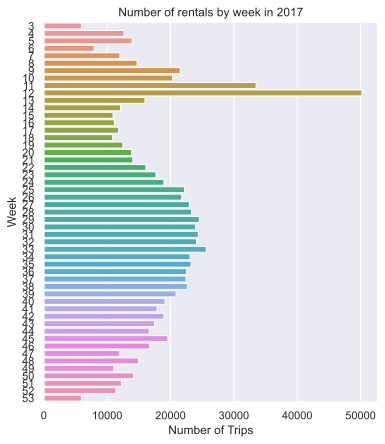

In [18]:
# Plot number of rides per week
plt.figure(figsize=(6, 7))
sns.countplot(y=df['starttime'].dt.week)
plt.ylabel('Week')
plt.xlabel('Number of Trips')
plt.title('Number of rentals by week in 2017')
plt.show()

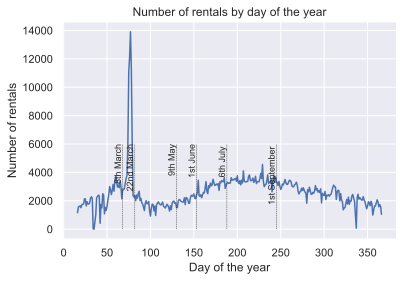

In [19]:
# Plot number of rides per day of the year
gt = df.groupby(df['starttime'].dt.dayofyear)['starttime']
gt.count().plot()
plt.xlabel('Day of the year')
plt.ylabel('Number of rentals')
plt.title('Number of rentals by day of the year')
holidays = [("8th March", 68),
            ("22nd March",82 ),
            ("9th May", 130),
            ("1st June", 153), 
            ("6th July ", 188),
            ("1st September ", 245)
           ]
for name, day in holidays:
    plt.plot([day,day], [0,6000], 
             'k--', linewidth=0.4)
    plt.text(day, 6000, name, fontsize=9, 
             rotation=90, ha='right', va='top')
plt.show()

c:\users\sci\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


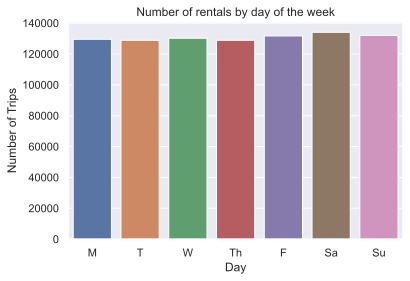

In [20]:
# Plot number of rides per day of the week
plt.figure()
sns.countplot(df['starttime'].dt.weekday)
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.title('Number of rentals by day of the week')
plt.xticks(np.arange(7),
           ['M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'])
plt.show()

# Станции

In [168]:
fig_height = 500
fig_width = 800
output_notebook()


def lat_to_mercY(lat):
    """Convert Latitude to Mercator Y"""
    return np.log(np.tan(np.pi/4+np.radians(lat)/2))*6378137.0

def lon_to_mercX(lon):
    """Convert Longitude to Mercator X"""
    return np.radians(lon)*6378137.0

def MapPoints(lat, lon, size=10, color="green", alpha=0.8, 
              padding=0.1, tooltips=None, title=None, 
              width=None, height=None, clims=None,
              palette= brewer, symmetric_color=False,tile_provider = tile_provider2):
    """Bokeh plot of points overlayed on a map"""
    
    # Convert lat,lon to UTM coordinates
    X = lon_to_mercX(lon)
    Y = lat_to_mercY(lat)
    
    # Set marker sizes
    if type(size) is int or type(size) is float:
        size = size*np.ones(len(lat))
    
    # Data source table for Bokbrewereh
    source = ColumnDataSource(data=dict(
        X = X,
        Y = Y,
        size = size
    ))
    
    # Color limits
    if type(color) is not str:
        if clims is None:
            if symmetric_color:
                cmin = -max(abs(color))
                cmax = max(abs(color))
            else:
                cmin = min(color)
                cmax = max(color)
        else:
            cmin = clims[0]
            cmax = clims[1]
            
    # Set marker colors
    if type(color) is not str: #map colors to a colormap
        source.add(color, 'color') #add to source table
        mapper = LinearColorMapper(palette=palette, 
                                   low=cmin, 
                                   high=cmax)
        color = {'field': 'color', 'transform': mapper}
            
    # Plot the points
    p = figure(tools="pan,wheel_zoom,reset,hover,save", 
               active_scroll="wheel_zoom")
    p.add_tile(tile_provider) #set background map
    p.circle('X', 'Y', source=source, size='size', 
             fill_color=color, fill_alpha=alpha, 
             line_color=None) #plot each station
    p.axis.visible = False
    
    # Colorbar
    if type(color) is not str:
        color_bar = ColorBar(color_mapper=mapper, 
                             location=(0, 0))
        p.add_layout(color_bar, 'right')
        
    # Tool tips
    # On hover, show Station name

    if tooltips is not None:
        for T in tooltips: #add to Bokeh data source
            source.add(T[1].values.tolist(), name=T[0])
        hover = p.select_one(HoverTool) #set hover values
        hover.tooltips=[(T[0], "@"+T[0]) for T in tooltips]
        
    # Title
    if title is not None:
        p.title.text = title
        
    # Figure height
    if height is not None:
        p.plot_height = height
        
    # Figure width
    if width is not None:
        p.plot_width = width
    
    return p, source


tooltips = [("Station", coors['sname'])]

# Plot the stations
p, _ = MapPoints(coors.latitude, coors.longitude, 
                 title="Almaty Bike Station Locations",
                 tooltips=tooltips,
                 height=fig_height, width=fig_width,tile_provider = tile_provider2)

show(p)


Loading BokehJS ...

In [189]:
# On hover, show Station name and the number of docks
tooltips = [("Station", coors['sname']), 
            ("Docks", coors['slots'])]

# Plot the stations
p, _ = MapPoints(coors.latitude, coors.longitude, 
                 tooltips=tooltips, color=coors['slots'],
                 size=10*np.sqrt(coors['slots']/np.pi),
                 title="Number of Docks at each Station",
                 palette=brewer['Set1'][3], # RdYlBu[11],RdYlGn[11],RdPu[9]
                 height=fig_height, width=fig_width,tile_provider = tile_provider2)

show(p)

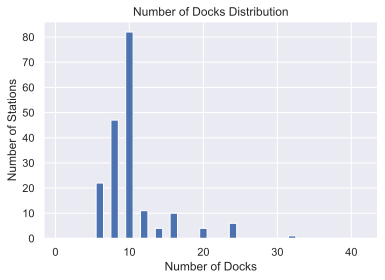

In [23]:
# Plot histogram of # docks at each station 
plt.figure()
plt.hist(coors['slots'], 
         bins=np.arange(0.5, 42.5, 1.))
plt.ylabel('Number of Stations')
plt.xlabel('Number of Docks')
plt.title('Number of Docks Distribution')
plt.show()

In [24]:
# Count incoming and outgoing trips for each station
demand_df = pd.DataFrame({
    'Outbound trips': df.groupby('start station id').size(),
    'Inbound trips': df.groupby('end station id').size()
})
demand_df['station_id'] = demand_df.index
sdf = coors.merge(demand_df, on='station_id')
sdf

station_id  longitude   latitude  slots  \
0          1001  76.967225  43.223566      8   
1          1002  76.961225  43.226664     12   
2          1003  76.953318  43.224545     10   
3          1004  76.954100  43.228700     10   
4          1005  76.953200  43.232400      6   
..          ...        ...        ...    ...   
182        5001  76.930500  43.269944     10   
183        6001  76.824470  43.250529      6   
184        6002  76.821285  43.253628     10   
185        6003  76.822015  43.256422      6   
186        6004  76.820398  43.260135      8   

                                             sname  Outbound trips  \
0           Терренкур 1 (Ул.Омарова-ул.Луганского)            1443   
1                       пр.Достык – ул.Хаджымукана            4338   
2                    ул. Назарбаева–ул.Хаджымукана            3255   
3    Кафе Менд-Аль ( пр.Аль-Фараби-ул.Мендикулова)            3605   
4      Kcell centr (ул. Мендикулова -ул.Бектурова)            3897   
..                                             ...             ...   
182                  пр. Райымбека - пр.Сейфуллина            2790   
183            пр.Рыскулова - ул.Момышулы (Магнум)            1095   
184   Нуркент ( Торгово-административный комплекс)             564   
185          остановка Наурыз(мкр. Нуркент дом 37)             484   
186         "Алатау" Театр традиционного искусства            1352   

     Inbound trips  
0              319  
1             2201  
2             1477  
3             2158  
4             2886  
..             ...  
182           5715  
183           1549  
184            855  
185            708  
186           2172  

[187 rows x 7 columns]

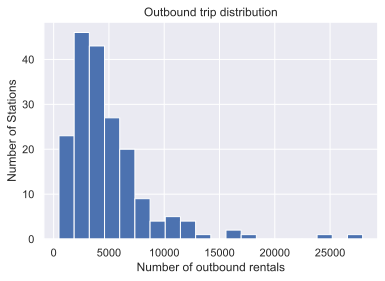

In [25]:
# Plot num trips started from each station 
plt.figure()
plt.hist(sdf['Outbound trips'], bins=20)
plt.ylabel('Number of Stations')
plt.xlabel('Number of outbound rentals')
plt.title('Outbound trip distribution')
plt.show()

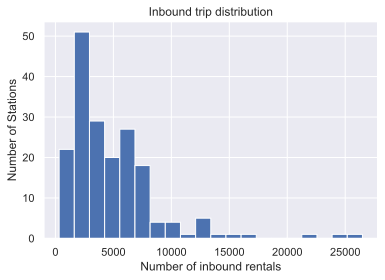

In [26]:
# Plot num trips started from each station 
plt.figure()
plt.hist(sdf['Inbound trips'], bins=20)
plt.ylabel('Number of Stations')
plt.xlabel('Number of inbound rentals')
plt.title('Inbound trip distribution')
plt.show()

Number of outbound trips: 915064
Number of inbound trips: 915064


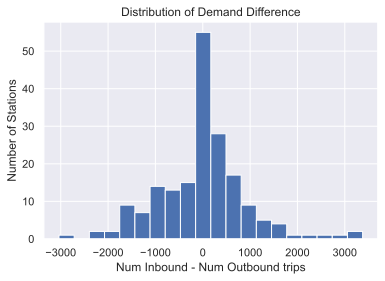

In [27]:
# Compute the DIFFERENCE between #incoming and #outgoing trips( разница между входящими и исходящими поездками)
sdf['demand_diff'] = sdf['Inbound trips']-sdf['Outbound trips']

# Sanity / valid data check
print('Number of outbound trips: %d'%(sdf['Outbound trips'].sum()))
print('Number of inbound trips: %d'%(sdf['Inbound trips'].sum()))

# Plot histogram of difference in demand
plt.figure()
plt.hist(sdf['demand_diff'], bins=20)
plt.ylabel('Number of Stations')
plt.xlabel('Num Inbound - Num Outbound trips')
plt.title('Distribution of Demand Difference')
plt.show()

In [28]:
sdf

station_id  longitude   latitude  slots  \
0          1001  76.967225  43.223566      8   
1          1002  76.961225  43.226664     12   
2          1003  76.953318  43.224545     10   
3          1004  76.954100  43.228700     10   
4          1005  76.953200  43.232400      6   
..          ...        ...        ...    ...   
182        5001  76.930500  43.269944     10   
183        6001  76.824470  43.250529      6   
184        6002  76.821285  43.253628     10   
185        6003  76.822015  43.256422      6   
186        6004  76.820398  43.260135      8   

                                             sname  Outbound trips  \
0           Терренкур 1 (Ул.Омарова-ул.Луганского)            1443   
1                       пр.Достык – ул.Хаджымукана            4338   
2                    ул. Назарбаева–ул.Хаджымукана            3255   
3    Кафе Менд-Аль ( пр.Аль-Фараби-ул.Мендикулова)            3605   
4      Kcell centr (ул. Мендикулова -ул.Бектурова)            3897   
..                                             ...             ...   
182                  пр. Райымбека - пр.Сейфуллина            2790   
183            пр.Рыскулова - ул.Момышулы (Магнум)            1095   
184   Нуркент ( Торгово-административный комплекс)             564   
185          остановка Наурыз(мкр. Нуркент дом 37)             484   
186         "Алатау" Театр традиционного искусства            1352   

     Inbound trips  demand_diff  
0              319        -1124  
1             2201        -2137  
2             1477        -1778  
3             2158        -1447  
4             2886        -1011  
..             ...          ...  
182           5715         2925  
183           1549          454  
184            855          291  
185            708          224  
186           2172          820  

[187 rows x 8 columns]

Есть  станции где есть дисбаланс. больше чем 50 станции не нуждаются в балансировке

#  Вот эту снизу которая по месяцам,и изменить цвет где 

In [29]:
# On hover, show station info
tooltips = [("Station", sdf['sname']), #show on hover
            ("Docks", sdf['slots']), 
            ("Num_Outbound", sdf['Outbound trips']),
            ("Num_Inbound", sdf['Inbound trips']),
            ("Inbound_minus_Outbound", sdf['demand_diff'])]

# Outbound trips 
p1, _ = MapPoints(sdf.latitude, sdf.longitude, 
                  tooltips=tooltips, color=sdf['Outbound trips'],
                  size=0.3*np.sqrt(sdf['Outbound trips']/np.pi),
                  title="Number of Outbound Trips",
                  palette=brewer['Reds'][9],
                  height=fig_height, width=fig_width)
tab1 = Panel(child=p1, title="Outbound Trips")

# Inbound trips
p2, _ = MapPoints(sdf.latitude, sdf.longitude, 
                  tooltips=tooltips, color=sdf['Inbound trips'],
                  size=0.3*np.sqrt(sdf['Inbound trips']/np.pi),
                  title="Number of Inbound Trips",
                  palette=brewer['Reds'][9],
                  height=fig_height, width=fig_width)
tab2 = Panel(child=p2, title="Inbound Trips")

# Difference in demand (Inbound - Outbound) trips
p3, _ = MapPoints(sdf.latitude, sdf.longitude, 
                  tooltips=tooltips, color=sdf['demand_diff'],
                  size=1*np.sqrt(np.abs(sdf['demand_diff'])/np.pi),
                  title="Inbound - Outbound Trips",
                  palette=brewer['Reds'][9],
                  symmetric_color=True, #centered @ 0
                  height=fig_height, width=fig_width)
tab3 = Panel(child=p3, title="Difference")

show(Tabs(tabs=[tab1, tab2, tab3]))


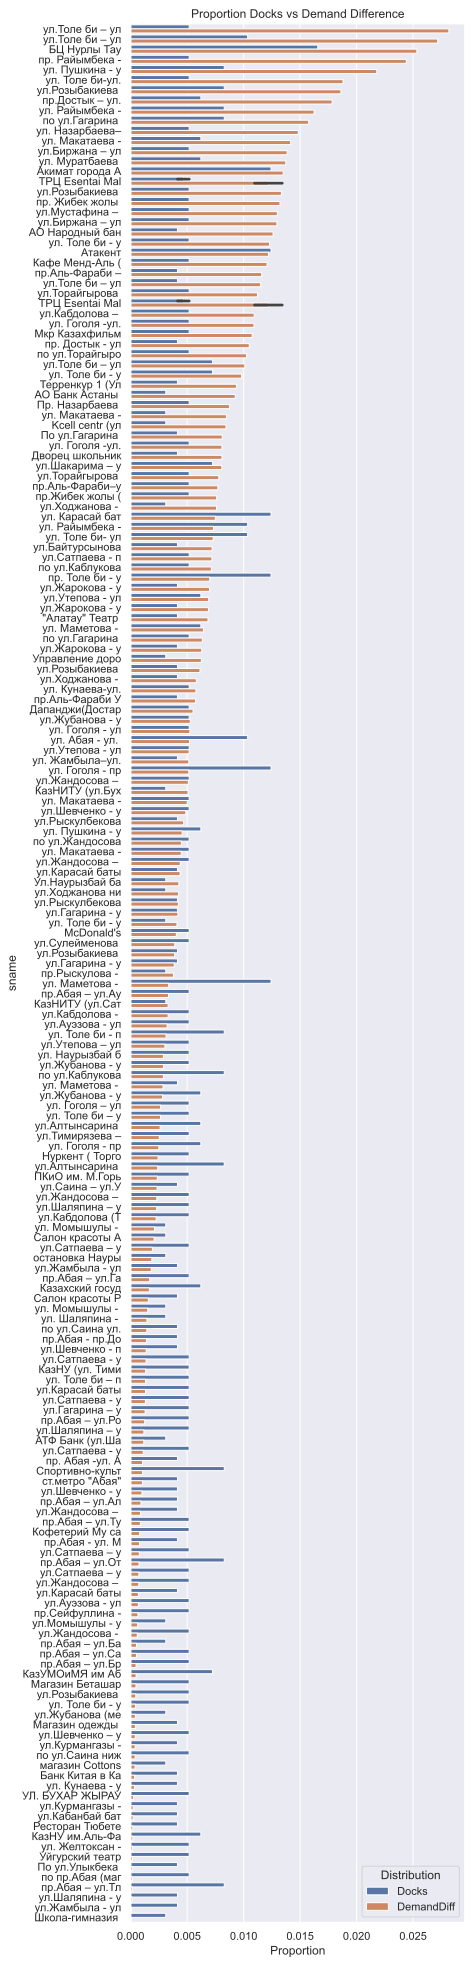

In [30]:
# Compute the ABSOLUTE diff between #incoming and #outgoing trips
sdf['abs_diff'] = sdf['demand_diff'].abs()

# Distributions of docks + abs demand diff across stations
sdf['Docks'] = sdf['slots']/sdf['slots'].sum()
sdf['DemandDiff'] = sdf['abs_diff']/sdf['abs_diff'].sum()

# Demand direction (more outgoing vs incoming)
sdf['demand_dir'] = sdf['station_id']
sdf.loc[sdf['demand_diff']<0, 'demand_dir'] = 'More Outgoing'
sdf.loc[sdf['demand_diff']>0, 'demand_dir'] = 'More Incoming'
sdf.loc[sdf['demand_diff']==0, 'demand_dir'] = 'Balanced'

# Tidy the data for seaborn
tidied = (
    sdf[['sname', 'Docks', 'DemandDiff']]
       .set_index('sname')
       .stack()
       .reset_index()
       .rename(columns={'level_1':'Distribution', 0:'Proportion'})
)

# Show the distributions
plt.figure(figsize=(6, 35))
station_list = (
      sdf
    .sort_values('DemandDiff', ascending=False)['sname']
    .tolist()
    )
sns.barplot(y='sname', x='Proportion', hue='Distribution', 
            data=tidied, order=station_list)
plt.title('Proportion Docks vs Demand Difference')
locs, labels = plt.yticks()
plt.yticks(locs, tuple([s[:15] for s in station_list]))
plt.show()

In [31]:
sdf.sort_values(by = ['DemandDiff','Docks'],ascending = False)

station_id  longitude   latitude  slots  \
125        3034  76.882933  43.250288     10   
176        4039  76.855386  43.246017     20   
24         2001  76.947915  43.228620     32   
182        5001  76.930500  43.269944     10   
23         1027  76.951436  43.270542     16   
..          ...        ...        ...    ...   
156        4019  76.858600  43.223600     10   
165        4028  76.839571  43.225257      8   
149        4009  76.874311  43.227076      8   
12         1014  76.950893  43.248479      8   
161        4024  76.837747  43.221109      6   

                                                sname  Outbound trips  \
125                           ул.Толе би – ул.Гайдара           18229   
176                     ул.Толе би – ул. Утеген батыр            4776   
24                                       БЦ Нурлы Тау            7278   
182                     пр. Райымбека - пр.Сейфуллина            2790   
23                        ул. Пушкина - ул. Райымбека            4380   
..                                                ...             ...   
156  по пр.Абая (магазин Kimex, напротив Family park)            2644   
165   По ул.Улыкбека ( между ул. Сайна и ул.Момышулы)             882   
149                        ул.Шаляпина - ул.Щепеткова            2839   
12                            ул.Жамбыла - ул.Кунаева            1371   
161            Школа-гимназия №153 им. А. Розыбакиева            1170   

     Inbound trips  demand_diff  abs_diff     Docks  DemandDiff     demand_dir  
125          21606         3377      3377  0.005176    0.028171  More Incoming  
176           8034         3258      3258  0.010352    0.027179  More Incoming  
24            4241        -3037      3037  0.016563    0.025335  More Outgoing  
182           5715         2925      2925  0.005176    0.024401  More Incoming  
23            6992         2612      2612  0.008282    0.021790  More Incoming  
..             ...          ...       ...       ...         ...            ...  
156           2626          -18        18  0.005176    0.000150  More Outgoing  
165            900           18        18  0.004141    0.000150  More Incoming  
149           2824          -15        15  0.004141    0.000125  More Outgoing  
12            1379            8         8  0.004141    0.000067  More Incoming  
161           1168           -2         2  0.003106    0.000017  More Outgoing  

[187 rows x 12 columns]

In [32]:
# Compute hourly trips at each station
df['Start hour'] = df['starttime'].dt.hour
df['End hour'] = df['stoptime'].dt.hour
outbound = ( #num trips in and out by hour for each station
    df.groupby(['start_st_name', 'Start hour'])['starttime']
         .count().to_frame().reset_index()
         .rename(columns={"starttime": "Outbound trips", 
                          "start_st_name": "Station name",
                          "Start hour": "Hour"}) 
)
inbound = ( #num trips in and out by hour for each station
    df.groupby(['end_st_name', 'End hour'])['stoptime']
         .count().to_frame().reset_index()
         .rename(columns={"stoptime": "Inbound trips", 
                          "end_st_name": "Station name",
                          "End hour": "Hour"})
)
trips_h = ( #num trips in and out by hour for each station
    pd.merge(outbound, inbound, how='outer', 
             on=['Station name', 'Hour'])
      .fillna(value=0)
      .sort_values(['Station name', 'Hour'])
)
trips_h['Difference'] = (trips_h['Inbound trips'] 
                         - trips_h['Outbound trips'])

# Pivot to get Nstations-by-Nhours arrays for in, out, and diff
trips_hp = (
    trips_h
    .pivot(index='Station name', columns='Hour')
    .fillna(value=0)
)

# Normalize by number of days in the season
ndays = (max(df['starttime'])-min(df['starttime'])).days
trips_hp = trips_hp/ndays

In [33]:
trips_hp

Outbound trips            \
Hour                                                           0         1    
Station name                                                                  
"Алатау" Театр традиционного искусства                   0.077143  0.045714   
Kcell centr (ул. Мендикулова -ул.Бектурова)              0.102857  0.025714   
McDonald's                                               0.051429  0.048571   
АО Банк Астаны (По Аль-Фараби между ул.Маркова ...       0.060000  0.031429   
АО Народный банк ( пр.Аль-Фараби -пр.Сейфуллина)         0.071429  0.040000   
...                                                           ...       ...   
ул.Шаляпина – ул.Берегового                              0.140000  0.080000   
ул.Шевченко - пр.Сейфуллина                              0.274286  0.134286   
ул.Шевченко - ул.Ауэзова                                 0.174286  0.094286   
ул.Шевченко - ул.Муканова                                0.134286  0.054286   
ул.Шевченко – ул.Байтурсынова                            0.128571  0.094286   

                                                                        \
Hour                                                      2         3    
Station name                                                             
"Алатау" Театр традиционного искусства              0.011429  0.000000   
Kcell centr (ул. Мендикулова -ул.Бектурова)         0.000000  0.000000   
McDonald's                                          0.020000  0.008571   
АО Банк Астаны (По Аль-Фараби между ул.Маркова ...  0.022857  0.011429   
АО Народный банк ( пр.Аль-Фараби -пр.Сейфуллина)    0.025714  0.017143   
...                                                      ...       ...   
ул.Шаляпина – ул.Берегового                         0.054286  0.014286   
ул.Шевченко - пр.Сейфуллина                         0.042857  0.042857   
ул.Шевченко - ул.Ауэзова                            0.048571  0.028571   
ул.Шевченко - ул.Муканова                           0.025714  0.014286   
ул.Шевченко – ул.Байтурсынова                       0.022857  0.002857   

                                                                        \
Hour                                                      4         5    
Station name                                                             
"Алатау" Театр традиционного искусства              0.011429  0.008571   
Kcell centr (ул. Мендикулова -ул.Бектурова)         0.005714  0.045714   
McDonald's                                          0.002857  0.017143   
АО Банк Астаны (По Аль-Фараби между ул.Маркова ...  0.017143  0.037143   
АО Народный банк ( пр.Аль-Фараби -пр.Сейфуллина)    0.008571  0.008571   
...                                                      ...       ...   
ул.Шаляпина – ул.Берегового                         0.008571  0.005714   
ул.Шевченко - пр.Сейфуллина                         0.017143  0.008571   
ул.Шевченко - ул.Ауэзова                            0.008571  0.045714   
ул.Шевченко - ул.Муканова                           0.011429  0.002857   
ул.Шевченко – ул.Байтурсынова                       0.011429  0.017143   

                                                                        \
Hour                                                      6         7    
Station name                                                             
"Алатау" Театр традиционного искусства              0.060000  0.037143   
Kcell centr (ул. Мендикулова -ул.Бектурова)         0.014286  0.054286   
McDonald's                                          0.045714  0.057143   
АО Банк Астаны (По Аль-Фараби между ул.Маркова ...  0.057143  0.234286   
АО Народный банк ( пр.Аль-Фараби -пр.Сейфуллина)    0.031429  0.074286   
...                                                      ...       ...   
ул.Шаляпина – ул.Берегового                         0.031429  0.168571   
ул.Шевченко - пр.Сейфуллина                         0.034286  0.168571   
ул.Шевченко - ул.Ауэзова                            0.09

In [37]:
print(len(trips_h['Station name'].unique()))
print(len(coors['sname'].unique()))

186
186


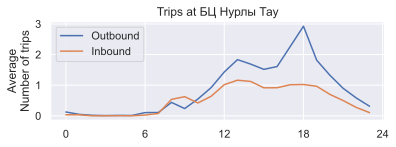

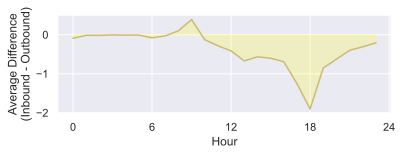

In [38]:
station_name = 'БЦ Нурлы Тау'

# Plot demand at Hennepin County Government Center
plt.figure()
plt.subplot(2, 1, 1)
inds = trips_hp['Outbound trips'].index==station_name
plt.plot(trips_hp['Outbound trips'].loc[inds,:].values[0])
plt.plot(trips_hp['Inbound trips'].loc[inds,:].values[0])
plt.xticks(np.arange(0, 25, 6))
#plt.xlabel('Hour')
plt.ylabel('Average\nNumber of trips')
plt.legend(['Outbound', 'Inbound'])
plt.title('Trips at '+f'{station_name}')
plt.show()

# Plot difference in demand at Hennepin County Government Center
plt.subplot(2, 1, 2)
inds = trips_hp['Difference'].index==station_name
plt.plot(trips_hp['Difference'].loc[inds,:].values[0], 'y')
plt.fill_between(np.arange(24), 0, 
                 trips_hp['Difference'].loc[inds,:].values[0],
                 color='yellow', alpha=0.2)
plt.xticks(np.arange(0, 25, 6))
plt.xlabel('Hour')
plt.ylabel('Average Difference\n(Inbound - Outbound)')
plt.show()

In [136]:
trips_hp['Inbound trips']

Hour                                                      0         1   \
Station name                                                             
"Алатау" Театр традиционного искусства              0.217143  0.091429   
Kcell centr (ул. Мендикулова -ул.Бектурова)         0.088571  0.000000   
McDonald's                                          0.168571  0.060000   
АО Банк Астаны (По Аль-Фараби между ул.Маркова ...  0.094286  0.088571   
АО Народный банк ( пр.Аль-Фараби -пр.Сейфуллина)    0.051429  0.008571   
...                                                      ...       ...   
ул.Шаляпина – ул.Берегового                         0.180000  0.091429   
ул.Шевченко - пр.Сейфуллина                         0.397143  0.137143   
ул.Шевченко - ул.Ауэзова                            0.182857  0.137143   
ул.Шевченко - ул.Муканова                           0.182857  0.077143   
ул.Шевченко – ул.Байтурсынова                       0.157143  0.054286   

Hour                                                      2         3   \
Station name                                                             
"Алатау" Театр традиционного искусства              0.031429  0.008571   
Kcell centr (ул. Мендикулова -ул.Бектурова)         0.002857  0.000000   
McDonald's                                          0.014286  0.014286   
АО Банк Астаны (По Аль-Фараби между ул.Маркова ...  0.017143  0.014286   
АО Народный банк ( пр.Аль-Фараби -пр.Сейфуллина)    0.005714  0.011429   
...                                                      ...       ...   
ул.Шаляпина – ул.Берегового                         0.048571  0.034286   
ул.Шевченко - пр.Сейфуллина                         0.065714  0.025714   
ул.Шевченко - ул.Ауэзова                            0.074286  0.034286   
ул.Шевченко - ул.Муканова                           0.025714  0.002857   
ул.Шевченко – ул.Байтурсынова                       0.028571  0.002857   

Hour                                                      4         5   \
Station name                                                             
"Алатау" Театр традиционного искусства              0.008571  0.008571   
Kcell centr (ул. Мендикулова -ул.Бектурова)         0.000000  0.000000   
McDonald's                                          0.005714  0.014286   
АО Банк Астаны (По Аль-Фараби между ул.Маркова ...  0.008571  0.005714   
АО Народный банк ( пр.Аль-Фараби -пр.Сейфуллина)    0.005714  0.002857   
...                                                      ...       ...   
ул.Шаляпина – ул.Берегового                         0.008571  0.005714   
ул.Шевченко - пр.Сейфуллина                         0.014286  0.020000   
ул.Шевченко - ул.Ауэзова                            0.002857  0.022857   
ул.Шевченко - ул.Муканова                           0.017143  0.005714   
ул.Шевченко – ул.Байтурсынова                       0.008571  0.028571   

Hour                                                      6         7   \
Station name                                                             
"Алатау" Театр традиционного искусства              0.034286  0.114286   
Kcell centr (ул. Мендикулова -ул.Бектурова)         0.048571  0.037143   
McDonald's                                          0.020000  0.068571   
АО Банк Астаны (По Аль-Фараби между ул.Маркова ...  0.014286  0.142857   
АО Народный банк ( пр.Аль-Фараби -пр.Сейфуллина)    0.020000  0.077143   
...                                                      ...       ...   
ул.Шаляпина – ул.Берегового                         0.045714  0.057143   
ул.Шевченко - пр.Сейфуллина                         0.054286  0.185714   
ул.Шевченко - ул.Ауэзова                            0.097143  0.260000   
ул.Шевченко - ул.Муканова                           0.022857  0.094286   
ул.Шевченко – ул.Байтурсынова                       0.051429  0.225714   

Hour                                                      8         9   ...  \
Station name                                                         

In [39]:
def HourSlider(loc, val, title='', height=500, width=800,
               palette=Viridis256, symmetric_color=False):
    """Plot map of points w/ values which change hourly
    
    Parameters
    ----------
    loc : pd.DataFrame
        Locations and names of stations.
        Must have Name, Latitude, and Longitude columns
        Size: (Nstations, 3)
    val : pd.DataFrame
        Values which change hourly
        Size: (Nstations, Nhours)
        
    Returns
    -------
    bokeh.models.layouts.Column
    Bokeh layout with the plot and slider
    """
    
    # On hover, show station name
    tooltips = [("Station", loc.sname),
                ("Docks",loc.slots)]


    # Plot trips
    V = np.transpose(val.values)
    p, src = MapPoints(loc.latitude, loc.longitude, 
                       tooltips=tooltips, color=V[12,:],
                       size=10*np.sqrt(np.abs(V[12,:])),
                       symmetric_color=symmetric_color,
                       palette=palette, title=title, 
                       height=height, width=width)
    
    # Make slider to control hour
    cb = CustomJS(args=dict(source=src, colors=V), code="""
        var h = cb_obj.value;
        var c = source.data['color'];
        var s = source.data['size'];
        for (var i = 0; i < c.length; i++) {
            c[i] = colors[h][i];
            s[i] = 10*Math.sqrt(Math.abs(colors[h][i]));
        }
        source.change.emit();
    """)
    slider = Slider(start=0, end=23, 
                    value=12, step=1, title="Hour")
    slider.js_on_change('value', cb)
    
    # Return figure w/ slider
    return column(p, slider)

# Outbound
p1 = HourSlider(coors.sort_values('sname'), 
                trips_hp['Outbound trips'], 
                title='Number of Outbound Trips, by Hour')
tab1 = Panel(child=p1, title="Outbound")

# Inbound
p2 = HourSlider(coors.sort_values('sname'), 
                trips_hp['Inbound trips'], 
                title='Number of Inbound Trips, by Hour')
tab2 = Panel(child=p2, title="Inbound")

# Difference
p3 = HourSlider(coors.sort_values('sname'), 
                trips_hp['Difference'], 
                title='Difference (Inbound - Outbound), by Hour',
                palette=brewer['Reds'][9],
                symmetric_color=True)
tab3 = Panel(child=p3, title="Difference ")

# Show all tabs
show(Tabs(tabs=[tab3, tab1, tab2])) 


проблема заключается в изменении спроса с течением времени. Даже когда станция имеет равномерный баланс входящих и исходящих рейсов в среднем, мы хотим, чтобы на станции было достаточно доков, чтобы компенсировать дисбалансы, которые происходят в течение дня. Например, предположим, что станция имеет в среднем 10 исходящих арендаторов утром, а затем 10 входящих арендаторов днем. В среднем существует идеальный баланс, так что Приятной поездке не нужно слишком беспокоиться о перераспределении велосипедов на эту станцию или с нее.

Но только если на станции достаточно доков! А что, если на станции всего 5 доков? Тогда на станции закончатся свободные велосипеды в середине утра, и придется привезти 5 велосипедов на станцию с какой-нибудь другой станции, чтобы больше людей могли взять напрокат их на этой станции. Если они этого не сделают almaty bike а упустит доход А во второй половине дня станция заполнится, и придется на 5 велосипедах подальше от станции

In [41]:
#Compute the cumulative difference in demand
cdiff = trips_hp['Difference'].apply(np.cumsum, axis=1)

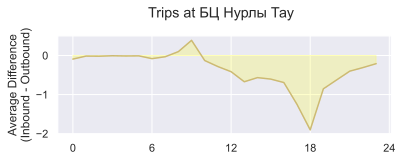

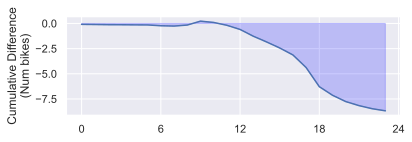

In [42]:
station_name = 'БЦ Нурлы Тау'

# Plot difference in demand at st
plt.figure()
plt.subplot(2, 1, 1)
inds = trips_hp['Difference'].index==station_name
plt.plot(trips_hp['Difference'].loc[inds,:].values[0], 'y')
plt.fill_between(np.arange(24), 0, 
                 trips_hp['Difference'].loc[inds,:].values[0],
                 color='yellow', alpha=0.2)
plt.xticks(np.arange(0, 25, 6))
plt.suptitle(' Trips at '+station_name)
#plt.xlabel('Hour')
plt.ylabel('Average Difference\n(Inbound - Outbound)')
plt.show()

# Plot cumulative difference in demand at Lake Street & Knox Ave S
plt.subplot(2, 1, 2)
plt.plot(cdiff.loc[station_name, :].index,
         cdiff.loc[station_name, :].values, 'b')
plt.fill_between(cdiff.loc[station_name, :].index, 0,
                 cdiff.loc[station_name, :].values,
                 color='blue', alpha=0.2)
plt.xticks(np.arange(0, 25, 6))
plt.ylabel('Cumulative Difference\n(Num bikes)')

plt.show()


In [46]:
len(cdiff.index.tolist())

186

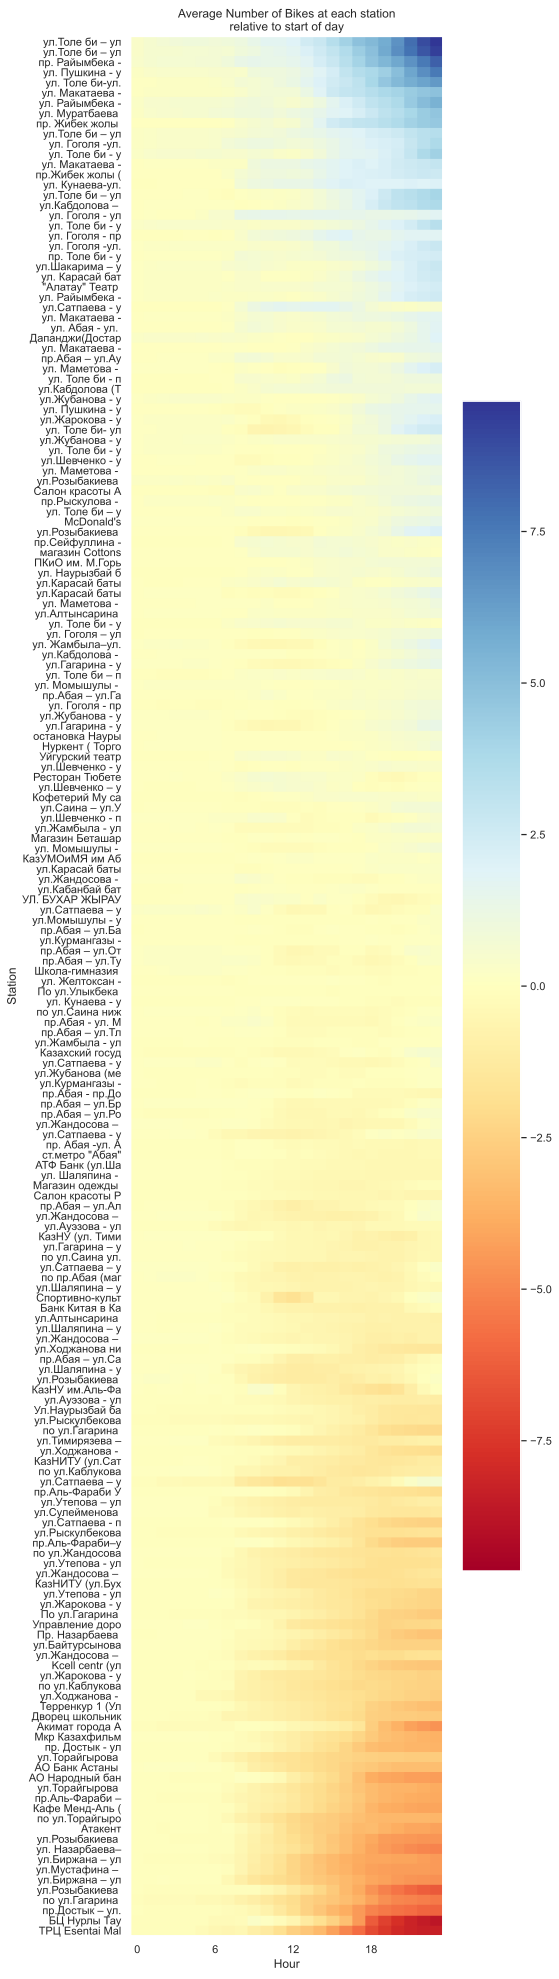

In [47]:
# Sort stations by overall demand difference
cdiff = cdiff.iloc[np.argsort(-np.sum(cdiff.values, axis=1)), :]

# Plot cumulative difference for each station
sns.set_style("dark")
plt.figure(figsize=(7, 35))
plt.imshow(cdiff, 
           aspect='auto',
           interpolation="nearest",
           #cmap = 'RdYlBu_r'
          )
plt.set_cmap('RdYlBu')
mav = np.amax(np.abs(cdiff.values))
plt.clim(-mav, mav)
cbar = plt.colorbar()
plt.ylabel('Cumulative Difference\n(Num bikes)')
plt.ylabel('Station')
plt.xlabel('Hour')
plt.xticks(np.arange(0, 24, 6))
plt.yticks(np.arange(cdiff.shape[0]),
           tuple([s[:15] for s in cdiff.index.tolist()]))
plt.title('Average Number of Bikes at each station\n' +
          'relative to start of day')
plt.show()

Синий показывает, когда на станции обычно больше велосипедов, чем было в начале дня, красный покажет, когда на станции меньше велосипедов, чем было в начале, а белый покажет, когда на станции примерно столько же велосипедов, сколько было в начале.
Из этого графика мы можем видеть, какие станции имеют наибольший дисбаланс входящих и исходящих поездок (станции с темно-красным или синим цветом), направление этого дисбаланса (красный=больше велосипедов, синий=меньше велосипедов) и в какое время дня этот дисбаланс является худшим.

In [61]:
len(cdiff.index.tolist())

186

In [48]:
# Create dataframe to store optimal initial # bikes
OptBikes = pd.DataFrame(index=trips_hp.index.tolist(), 
                        columns=['Opt Bikes'])

# Set alpha
alpha = 0.3

# Compute optimal initial number of bikes
for s in OptBikes.index: #for each station,
    Nd = coors.loc[coors.sname==s, 'slots'].values[0]
    bL = np.inf #best loss so far 
    bB = Nd/2   #best #bikes for that loss
    for N0 in range(Nd+1): #for each possible initial # of bikes,
        L = 0 #loss w/ this # initial bikes
        for h in np.arange(24): #for each hour,
            Dt = trips_hp['Difference'].loc[s, h] #diff @ now
            Ct = cdiff.loc[s, h] #cum diff @ now
            L = ( L + #integrate the loss function!
                  alpha*max(0,Dt)*np.exp(N0+Ct-Nd) -
                  (1.0-alpha)*min(0,Dt)*np.exp(-N0-Ct))
        if L<bL: #if best loss so far,
            bL = L #save this loss 
            bB = N0 #and #bikes
    OptBikes.loc[s,'Opt Bikes'] = bB

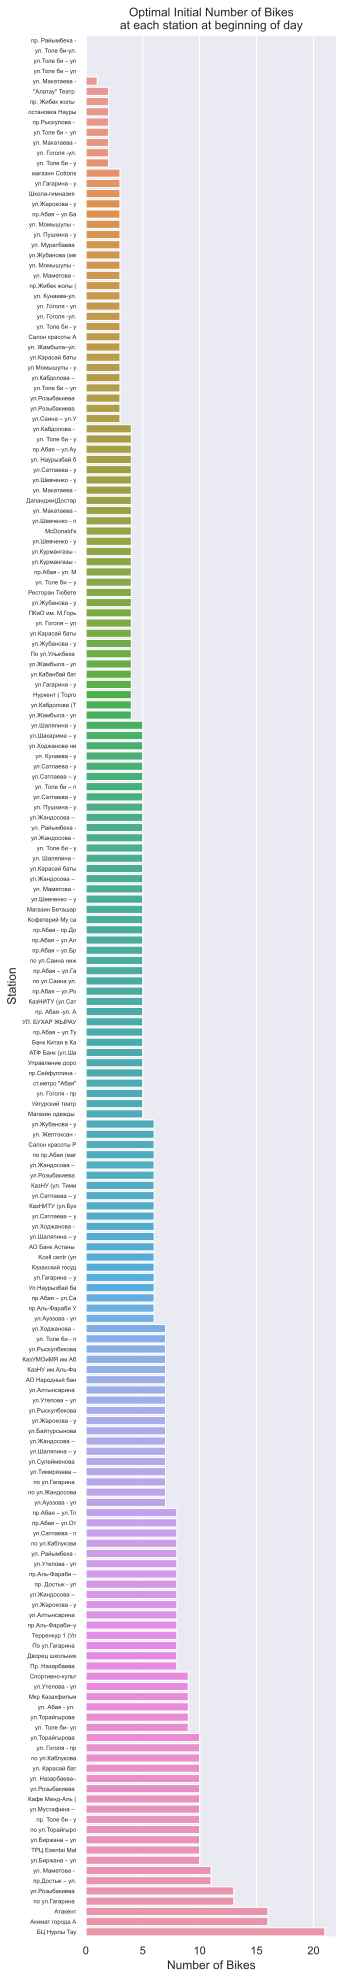

In [49]:

sns.set()
plt.figure(figsize=(4.5, 35))
station_list = (OptBikes
                    .sort_values('Opt Bikes')
                    .index
                    .tolist())
sns.barplot(y=OptBikes.index.tolist(), 
            x=OptBikes['Opt Bikes'], 
            order=station_list)
sns.barplot(y=OptBikes.index.tolist(), 
            x=OptBikes['Opt Bikes'], 
            order=station_list)
plt.title('Optimal Initial Number of Bikes\n' +
          'at each station at beginning of day')
locs, labels = plt.yticks()
plt.yticks(locs, tuple([s[:15] for s in station_list]))
plt.xlabel('Number of Bikes')
plt.ylabel('Station')
plt.tick_params(axis='y', labelsize=6)
plt.show()

# L(N0)=∫tαmax(0,Dt)exp(N0+Ct−Nd)−(1−α)min(0,Dt)exp(−N0−Ct) dt
L(N0) - потеря старта с N_0 доков в начале дня
Dt - это разница спроса в момент времени t (входящие поездки минус исходящие поездки)
Ct - это совокупная разница спроса (Ct=∫t0Dx dx)
Nd - это количество доков на станции
α-это параметр, который определяет, насколько плохо для станции быть полной или пустой

Давайте рассмотрим каждую часть этого слишком сложного уравнения. Интеграл в уравнении потерь суммирует по всем часам дня (но вы можете использовать более точный интервал времени, если хотите). Первая половина того, что находится внутри интеграла (αmax (0, Dt) exp (N0 + C (t) −Nd)) - это значение, которое будет большим, когда станция близка к заполнению и количество входящих поездок больше, чем исходящих. едет. max (0, Dt) - это просто разница в спросе, но только когда она положительна (и 0 - когда отрицательна). N0 + C (t) −Nd - это (отрицательное из) ожидаемое количество пустых доков, оставшихся на станции. Таким образом, когда ожидаемое количество пустых доков на станции очень мало, exp (N0 + Ct-Nd) будет очень большим, и наоборот. Таким образом, когда ожидаемое количество пустых доков на станции невелико, а количество входящих рейсов велико, значение max (0, Dt) exp (N0 + Ct-Nd) будет большим.

Но мы также хотим наказать за пустую станцию, когда люди хотят взять напрокат велосипеды! Вторая половина того, что входит в интеграл (- (1 − α) min (0, Dt) exp (−N0 − Ct)), - это значение, которое будет большим, когда станция почти пуста и есть больше поездок за границу. чем въездные едет. min (0, Dt) - разница в спросе, но только когда она отрицательная (и 0, когда она положительная). (−N0 − Ct) - (отрицательное значение) ожидаемое количество велосипедов, оставленных на станции. Таким образом, когда ожидаемое количество велосипедов, доступных на станции, мало, exp (-N0-Ct) будет очень большим, и наоборот. Поэтому, когда ожидаемое количество доступных велосипедов на станции невелико, а количество выездных поездок высокое, значение −min (0, Dt) exp (−N0 − Ct) будет большим.

Параметр α определяет, насколько плохо заполнение станций велосипедами по сравнению с тем, что велосипеды заканчиваются, и должен принимать значения от 0 до 1. Если α <0,5, это означает, что мы считаем «более плохим», когда станция пуста. но есть люди, которые хотят арендовать на этой станции, чем когда она заполнена, и люди хотят закончить свои поездки на ней. Я собираюсь установить α = 0,3, потому что мне кажется немного хуже иметь пустую станцию, когда кто-то хочет взять напрокат велосипед, чем заполнить станцию, когда кто-то хочет вернуть велосипед. В любом случае клиент злится, но если станция, на которой он хочет арендовать, пуста, он, вероятно, не арендует велосипед, а almaty bike упустит прибыль. Если станция, на которую они хотят вернуть свой велосипед, заполнена, им просто нужно найти другую станцию ​​и вернуть ее туда.

(Имейте в виду, что оптимизация этой встроенной функции потерь технически не даст нам «оптимальное» количество начальных велосипедов. Чтобы получить это, мы хотели бы построить прогнозную модель и провести полный анализ затрат и выгод. Подробнее об этом позже.)

Давайте вычислим оптимальное количество велосипедов для каждой станции, которое будет иметься в начале дня, используя эту функцию потерь. 

<ipython-input-50-c2f51beb508c>:10: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='', xy=(13,RC.min()), xytext=(13,RC.max()),


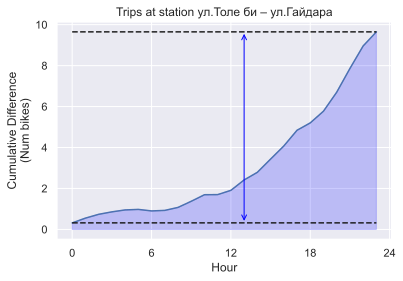

In [50]:
# Plot cumulative difference at 
station_name = 'ул.Толе би – ул.Гайдара'
plt.figure()
RH = cdiff.loc[station_name, :].index
RC = cdiff.loc[station_name, :].values
plt.plot(RH, RC, 'b')
plt.fill_between(RH, 0, RC, color='blue', alpha=0.2)
plt.plot([0, 23], [RC.max(), RC.max()], 'k--')
plt.plot([0, 23], [RC.min(), RC.min()], 'k--')
plt.annotate(s='', xy=(13,RC.min()), xytext=(13,RC.max()), 
             arrowprops=dict(arrowstyle='<->',color = 'blue'))
plt.xticks(np.arange(0, 25, 6))
plt.xlabel('Hour')
plt.ylabel('Cumulative Difference\n(Num bikes)')
plt.title('Trips at station '+station_name)
plt.show()

Чем больше значение диапазона спроса, тем больше доков должна иметь станция, чтобы буферизировать этот поток в количестве велосипедов на станции.

вычислим диапазон спроса для каждой станции и посмотрим, как распределение диапазонов спроса сравнивается с распределением доков по всем станциям

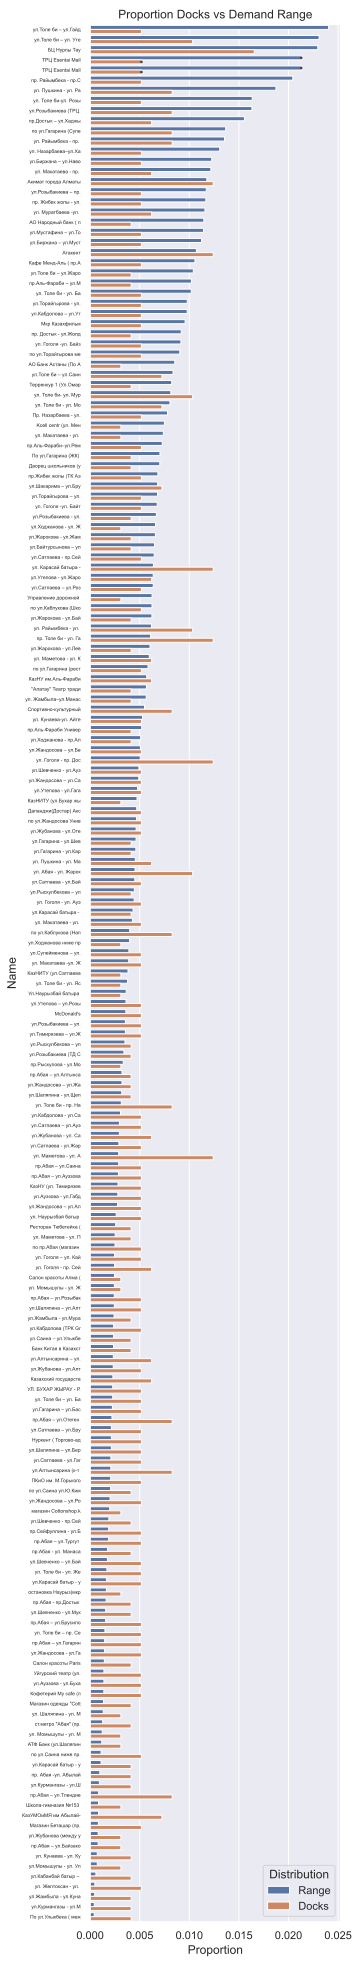

In [51]:
# Create dataframe to store demand ranges
range_vs_docks = pd.DataFrame(index=coors['sname'].tolist(), 
                              columns=['Range', 'Docks'])

# Compute demand range for each station
for s in range_vs_docks.index:
    RC = cdiff.loc[s, :].values
    range_vs_docks.loc[s,'Range'] = RC.max() - RC.min()
    D = coors.loc[coors.sname==s,'slots'].values[0]
    range_vs_docks.loc[s,'Docks'] = D
    
# Normalize distributions
range_vs_docks = range_vs_docks.apply(lambda x: x/np.sum(x))
    
# Tidy the data for seaborn
tidified = (
    range_vs_docks
       .stack()
       .reset_index()
       .rename(columns={'level_0': 'Name',
                        'level_1': 'Distribution', 
                        0: 'Proportion'})
)

# Show the distributions
plt.figure(figsize=(4.5, 35))
station_list = (
    range_vs_docks
    .sort_values('Range', ascending=False)
    .index.tolist()
)
sns.barplot(y='Name', x='Proportion', hue='Distribution', 
            data=tidified, order=station_list)
plt.title('Proportion Docks vs Demand Range')
locs, labels = plt.yticks()
plt.yticks(locs, tuple([s[:20] for s in station_list]))
plt.tick_params(axis='y', labelsize=5)
plt.show()

# Flow

In [52]:
# Compute number of trips from each station to each other station
flow = (
     df.groupby(['start_st_name', 'end_st_name'])['starttime']
    .count().to_frame().reset_index()
    .rename(columns={"starttime": "Trips"})
    .pivot(index='start_st_name', columns='end_st_name')
    .fillna(value=0)
)

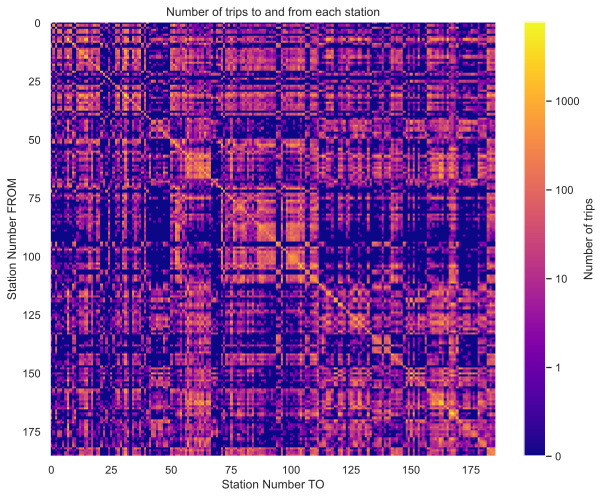

In [53]:
# Plot trips to and from each station
sns.set_style("dark")
plt.figure(figsize=(10, 8))
plt.imshow(np.log10(flow.values+0.1),
           aspect='auto',
           interpolation="nearest")
plt.set_cmap('plasma')
cbar = plt.colorbar(ticks=[-1,0,1,2,3])
cbar.set_label('Number of trips')
cbar.ax.set_yticklabels(['0','1','10','100','1000'])
plt.ylabel('Station Number FROM')
plt.xlabel('Station Number TO')
plt.title('Number of trips to and from each station')
plt.show()

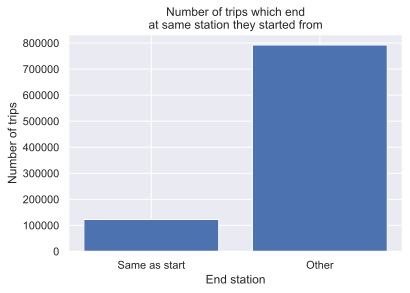

In [54]:
# Plot num trips returning to same station
sns.set()
plt.figure()
plt.bar([0, 1], 
        [np.trace(flow.values), 
         flow.values.sum()-np.trace(flow.values)],
        tick_label=['Same as start', 'Other'])
plt.xlabel('End station')
plt.ylabel('Number of trips')
plt.title('Number of trips which end\n'+
          'at same station they started from')
plt.show()


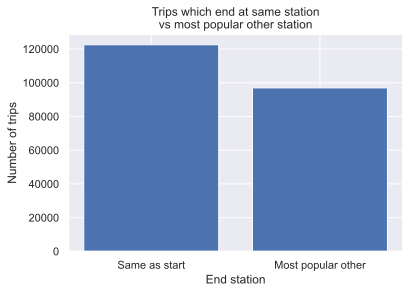

In [55]:
# Compute num trips to self + most popular other
V = flow.copy().values
num_same = np.trace(V)
np.fill_diagonal(V, np.nan)
second_best = np.nanmax(V, axis=0).sum()

# Plot num trips returning to same station
plt.figure()
plt.bar([0, 1], [num_same, second_best],
        tick_label=['Same as start', 'Most popular other'])
plt.xlabel('End station')
plt.ylabel('Number of trips')
plt.title('Trips which end at same station\n'+
          'vs most popular other station')
plt.show()

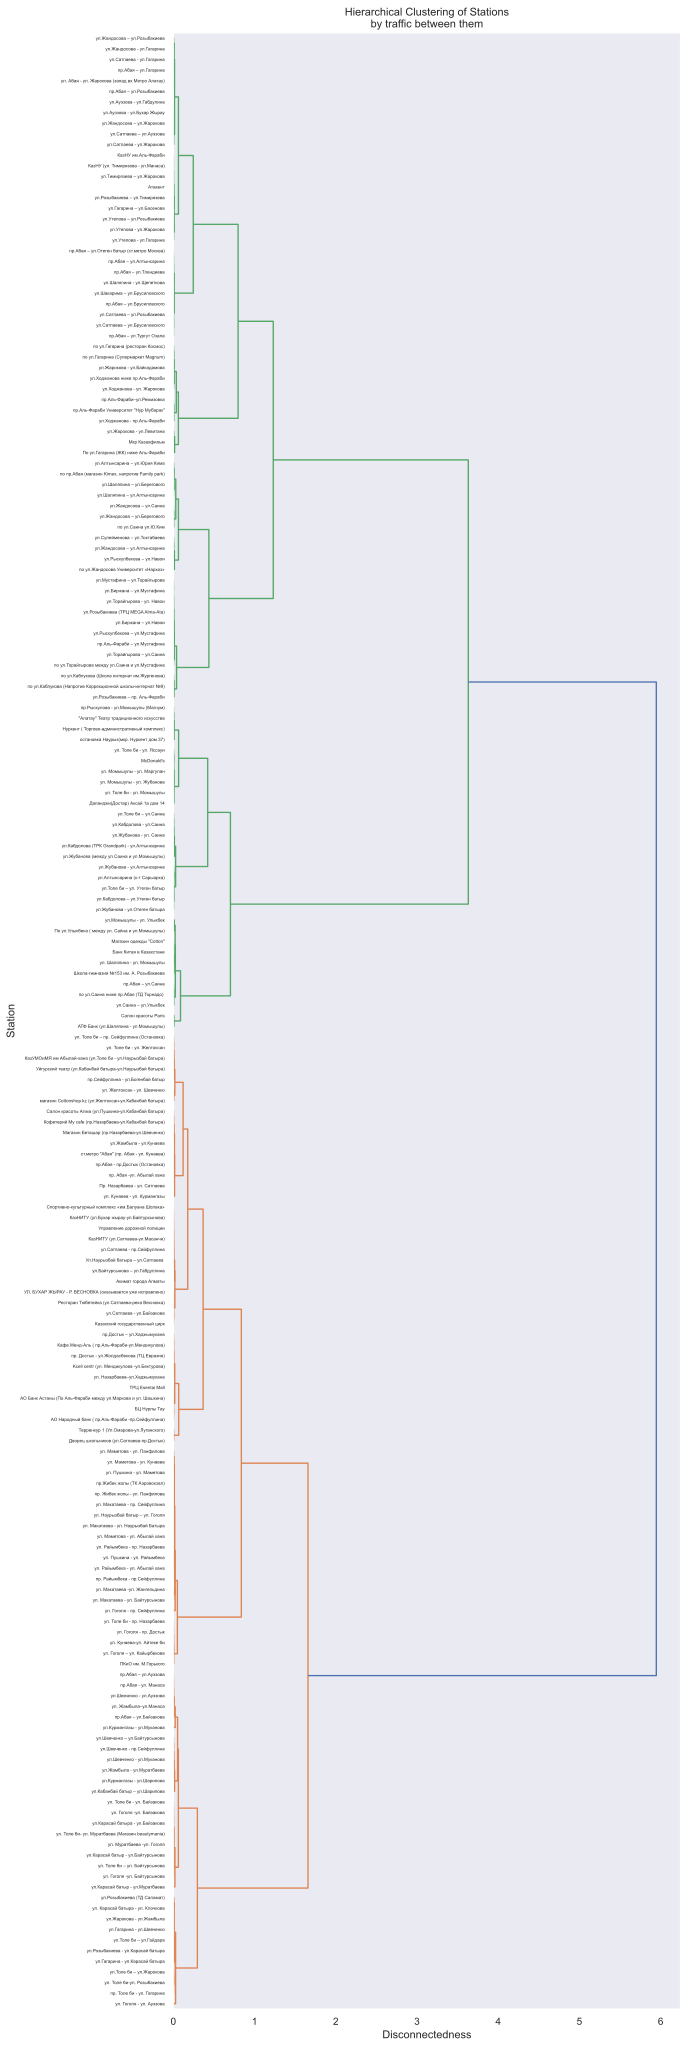

In [57]:
# Normalized flow (proportion trips to OR from)
names = flow.index.tolist() #station names
counts = flow.values #trip counts
sflow = counts+np.transpose(counts) #symmetric
dist = 1.0/(sflow+1) #"distance"
np.fill_diagonal(dist, 0.0) #0 distance to same station

# Dendrogram
sns.set_style("dark")
plt.figure(figsize=(10,40))
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
sdist = squareform(dist)
Z = hierarchy.linkage(sdist, 'ward')
dg = hierarchy.dendrogram(Z, labels=names,
                          orientation='right')
plt.xlabel('Disconnectedness')
plt.ylabel('Station')
plt.title('Hierarchical Clustering of Stations'+
           '\nby traffic between them')
plt.show()

Возвращение на одну и ту же станцию-самая популярная поездка, хотя поездок почти столько же, сколько и на вторую по популярности станцию.

Существуют ли кластеры станций, между которыми клиенты ездят?  Предыдущая матрица никак не группировала станции и не располагала их в определенном порядке, поэтому мы не смогли получить эту информацию из этого графика. Однако мы можем иерархически сгруппировать схемы потоков между станциями, чтобы увидеть, какие группы станций имеют много поездок между собой, но не так много на другие станции вне группы.

Мы вычислим “расстояние” или “разобщенность” между парой станций, взяв обратную величину числа поездок между этой парой станций. Затем  можем построить дендрограмму, которая показывает, насколько разобщены различные группы станций.

<ipython-input-58-082cdfdc1036>:7: RuntimeWarning: divide by zero encountered in log10
  counts = np.log10(counts)


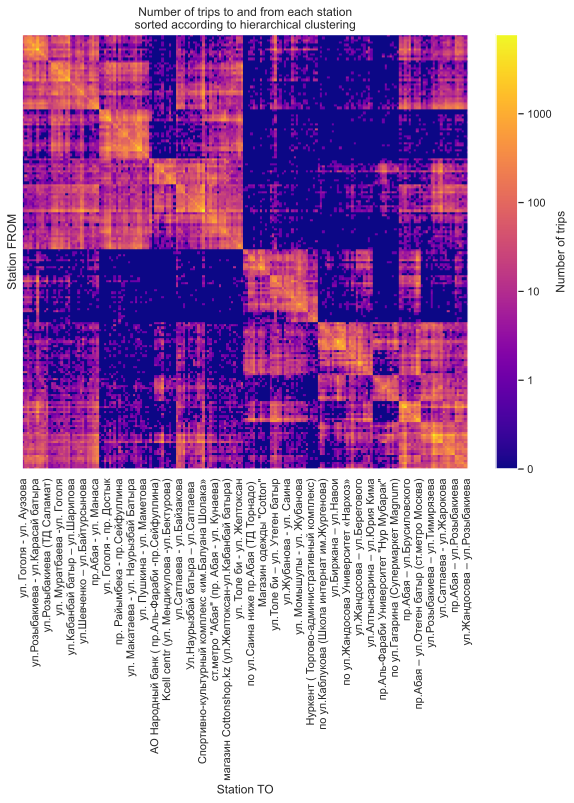

In [58]:
# Get the ordering of the dendrogram
inds = [names.index(sn) for sn in dg['ivl']]

# Get trip counts ordered by dendrogram
counts = flow.copy().values[inds,:]
counts = counts[:,inds]
counts = np.log10(counts)
counts[counts<0] = -1

# Plot the log flow matrix
plt.figure(figsize=(10, 8))
plt.imshow(counts,
           aspect='auto',
           interpolation="nearest")
plt.set_cmap('plasma')
cbar = plt.colorbar(ticks=[-1,0,1,2,3])
cbar.set_label('Number of trips')
cbar.ax.set_yticklabels(['0','1','10','100','1000'])
plt.ylabel('Station FROM')
plt.xlabel('Station TO')
plt.yticks([], [])
snums = range(len(dg['ivl']))
plt.xticks(snums[0::5], dg['ivl'][0::5],
           rotation='vertical')
plt.yticks([], [])
plt.title('Number of trips to and from each station'+
          '\nsorted according to hierarchical clustering')
plt.show()



In [59]:
# Get number of trips from each station to each other station
#tile_provider = get_provider(Vendors.CARTODBPOSITRON)
# (row i is num trips from station i)
RC = flow.copy().values + 1

# Re-order data in C to match data in stations df
flow_idx = flow.index.tolist()
flow_col = flow['Trips'].columns.tolist()
inds_idx = [flow_idx.index(sn) for sn in coors.sname.tolist()]
inds_col = [flow_col.index(sn) for sn in coors.sname.tolist()]
RC = RC[inds_idx,:]
RC = RC[:,inds_col]

# Convert lat,lon to UTM coordinates
X = lon_to_mercX(coors.longitude)
Y = lat_to_mercY(coors.latitude)

# Data for bokeh
source = ColumnDataSource(data=dict(
    name = coors.sname.tolist(),
    X = X,
    Y = Y,
    x0 = X[0]*np.ones_like(X),
    y0 = Y[0]*np.ones_like(Y),
    V = RC[0,:],
    W = RC[0,:]*0.01,
))

# Log color map for line color
mapper = LogColorMapper(palette=Viridis256, 
                        low=0, high=5000)
color = {'field': 'V', 'transform': mapper}

# Plot the points and segments
p = figure(tools="pan,wheel_zoom,reset,save", 
           active_scroll="wheel_zoom")

p.add_tile(tile_provider) #background map
p.axis.visible = False
sr = p.segment(x0='x0', y0='y0', x1='X', y1='Y',
               source=source, line_color=color,
               line_width='W', line_cap='round')
cr = p.circle(x='X', y='Y', source=source,
              size=20, color='gray', alpha=0.4, 
              hover_color='gray', hover_alpha=1.0)

# Set lines on hover
min_trips = 10 #don't plot if <10 trips
code = """
var x0 = source.data['x0']
var y0 = source.data['y0']
var X = source.data['X']
var Y = source.data['Y']
var V = source.data['V']
var W = source.data['W']
var indices = cb_data.index['1d'].indices;
if (indices.length > 0) {
    ind = indices[0]
    for (i=0; i<x0.length; i++) {
        x0[i] = X[ind]
        y0[i] = Y[ind]
        V[i] = C[ind][i]
        if (C[ind][i]>%d) {
            W[i] = C[ind][i]*0.01
        } else {
            W[i] = 0.001
        }
    }
}
source.change.emit();
""" % min_trips
callback = CustomJS(args=dict(source=source, C=RC), 
                    code=code)
tooltips = [("Station", "@name")]
p.add_tools(HoverTool(tooltips=tooltips, 
                      callback=callback, 
                      renderers=[cr]))

# Color bar
color_bar = ColorBar(color_mapper=mapper, 
                     location=(0, 0))
p.add_layout(color_bar, 'right')

# Show plot
p.title.text = 'Потоки между станциями'
show(p)

# Data splitted by each moth

In [143]:
months = ('Jan','Feb','Mar','Apr',
         'May','Jun','Jul','Aug',
         'Sep','Oct','Nov','Dec')


   


df['month'] = df['starttime'].dt.month
df['Start hour'] = df['starttime'].dt.hour
df['End hour'] = df['stoptime'].dt.hour
g = df.groupby('month')

#def get_by_month(dataset):

for i in  range(1,13):
    df_m = g.get_group(i)
    df_m.drop('month',axis = 1,inplace=True)
    demand_df_m = pd.DataFrame({
         'Outbound trips': df_m.groupby('start station id').size(),
         'Inbound trips': df_m.groupby('end station id').size()
                             })
    demand_df_m['station_id'] = demand_df_m.index
    sdf_m = coors.merge(demand_df_m, on='station_id')
    sdf_m['demand_diff'] = sdf_m['Inbound trips']-sdf_m['Outbound trips']
    sdf_m['abs_diff'] = sdf_m['demand_diff'].abs()
    sdf_m['Docks'] = sdf_m['slots']/sdf_m['slots'].sum()
    sdf_m['DemandDiff'] = sdf_m['abs_diff']/sdf_m['abs_diff'].sum()
        # Demand direction (more outgoing vs incoming)
    sdf_m['demand_dir'] = sdf['station_id']
    sdf_m.loc[sdf['demand_diff']<0, 'demand_dir'] = 'More Outgoing'
    sdf_m.loc[sdf['demand_diff']>0, 'demand_dir'] = 'More Incoming'
    sdf_m.loc[sdf['demand_diff']==0, 'demand_dir'] = 'Balanced'
        # Compute hourly trips at each station
   
    outbound_m = ( #num trips in and out by hour for each station
        df_m.groupby(['start_st_name', 'Start hour'])['starttime']
          .count().to_frame().reset_index()
          .rename(columns={"starttime": "Outbound trips", 
                          "start_st_name": "Station name",
                          "Start hour": "Hour"}) 
       )
    inbound_m = ( #num trips in and out by hour for each station
       df_m.groupby(['end_st_name', 'End hour'])['stoptime']
         .count().to_frame().reset_index()
         .rename(columns={"stoptime": "Inbound trips", 
                          "end_st_name": "Station name",
                          "End hour": "Hour"})
       )
    trips_h_m = ( #num trips in and out by hour for each station
       pd.merge(outbound_m, inbound_m, how='outer', 
             on=['Station name', 'Hour'])
      .fillna(value=0)
      .sort_values(['Station name', 'Hour'])
      )
    trips_h_m['Difference'] = (trips_h['Inbound trips'] 
                         - trips_h['Outbound trips'])

     # Pivot to get Nstations-by-Nhours arrays for in, out, and diff
    trips_hp_m = (
      trips_h_m
       .pivot(index='Station name', columns='Hour')
       .fillna(value=0)
     )

       # Normalize by number of days in the season
    ndays_m = (max(df_m['starttime'])-min(df_m['starttime'])).days
    trips_hp_m = trips_hp_m/ndays_m
    cdiff_m = trips_hp_m['Difference'].apply(np.cumsum, axis=1)
    
    
    ## create new df for storing demand range
    range_vs_docks_m = pd.DataFrame(index=cdiff_m.index.tolist(), 
                                  columns=['Range', 'Docks'])
    # Compute demand range for each station
    for s in range_vs_docks_m.index:
        RC_m = cdiff_m.loc[s, :].values
        range_vs_docks_m.loc[s,'Range'] = RC_m.max() - RC_m.min()
        D_m = coors.loc[coors.sname==s,'slots'].values[0]
        range_vs_docks_m.loc[s,'Docks'] = D_m
          # Normalize distributions
        range_vs_docks_m = range_vs_docks_m.apply(lambda x: x/np.sum(x))
        
        
#### creating traffic flow data 
    flow_m = (
     df_m.groupby(['start_st_name', 'end_st_name'])['starttime']
    .count().to_frame().reset_index()
    .rename(columns={"starttime": "Trips"})
    .pivot(index='start_st_name', columns='end_st_name')
    .fillna(value=0)
    )
####### saving each months data in new vars 
    vars()["df_month_"+months[i -1]]= df_m
    vars()["sdf_month_"+months[i -1]]= sdf_m
    vars()["cdiff_month_"+months[i -1]]= cdiff_m
    vars()["trips_h_month_"+months[i -1]]= trips_h_m
    vars()["trips_hp_month_"+months[i-1]]= trips_hp_m
    vars()["flow_month_"+months[i-1]]= flow_m
    vars()["range_vs_docks_month_"+months[i-1]]=range_vs_docks_m
    
#### how to get the data by month :: 
 ###                                'dataset_name'+_month_First3letterofmonth
    ####                            for example ::  sdf_month_Sep ( sdf data for Septemper)

In [1]:
### ДОБАВИТЬ ССЫЛКУ НА ИСТОЧНИК АНАЛИЗА И КОДА

In [79]:
months[1]

'Feb'

In [161]:
#coors = coors.dropna()
z 


station_id  longitude   latitude  slots  \
0          1001  76.967225  43.223566      8   
1          1002  76.961225  43.226664     12   
2          1003  76.953318  43.224545     10   
3          1004  76.954100  43.228700     10   
4          1005  76.953200  43.232400      6   
..          ...        ...        ...    ...   
179        5001  76.930500  43.269944     10   
180        6001  76.824470  43.250529      6   
181        6002  76.821285  43.253628     10   
182        6003  76.822015  43.256422      6   
183        6004  76.820398  43.260135      8   

                                             sname  Outbound trips  \
0           Терренкур 1 (Ул.Омарова-ул.Луганского)              62   
1                       пр.Достык – ул.Хаджымукана             463   
2                    ул. Назарбаева–ул.Хаджымукана             273   
3    Кафе Менд-Аль ( пр.Аль-Фараби-ул.Мендикулова)             305   
4      Kcell centr (ул. Мендикулова -ул.Бектурова)             256   
..                                             ...             ...   
179                  пр. Райымбека - пр.Сейфуллина             166   
180            пр.Рыскулова - ул.Момышулы (Магнум)              27   
181   Нуркент ( Торгово-административный комплекс)              14   
182          остановка Наурыз(мкр. Нуркент дом 37)               4   
183         "Алатау" Театр традиционного искусства              24   

     Inbound trips  demand_diff  abs_diff     Docks  DemandDiff     demand_dir  
0               11          -51        51  0.004197    0.006757  More Outgoing  
1              310         -153       153  0.006296    0.020270  More Outgoing  
2              126         -147       147  0.005247    0.019475  More Outgoing  
3              189         -116       116  0.005247    0.015368  More Outgoing  
4              192          -64        64  0.003148    0.008479  More Outgoing  
..             ...          ...       ...       ...         ...            ...  
179            350          184       184  0.005247    0.024377  More Incoming  
180             40           13        13  0.003148    0.001722  More Incoming  
181             18            4         4  0.005247    0.000530  More Incoming  
182             19           15        15  0.003148    0.001987  More Incoming  
183             51           27        27  0.004197    0.003577  More Incoming  

[184 rows x 12 columns]